# Estimating return periods of extreme values

In [1]:
import earthkit.data as ekd
import earthkit.meteo.stats as ekm_stats
import earthkit.plots as ekp

ekd.settings.set("cache-policy", "user")

Load a monthly timeseries of maximum daily precipitation from CDS: https://cds.climate.copernicus.eu/datasets/multi-origin-c3s-atlas

In [ ]:
rx1day = ekd.from_source(
    "cds",
    "multi-origin-c3s-atlas",
    origin="era5",
    domain="global",
    period="1940-2022",
    variable="monthly_maximum_of_1_day_accumulated_precipitation",
    area=[57, -7, 48, 3]
)

Fit an extreme value distribution to the timeseries of maximum precipitation values at every gridpoint:

In [3]:
dist = ekm_stats.GumbelDistribution.fit(rx1day.to_numpy(), axis=0)

Determine the return period of months where the maximum daily precipitation exceeds a threshold value (here: 30 mm) based on the fitted distribution:

In [4]:
threshold = 30.

return_period = ekm_stats.value_to_return_period(dist, threshold)
return_period = return_period / 12  # convert to years

Visualize the computed return periods on a map:

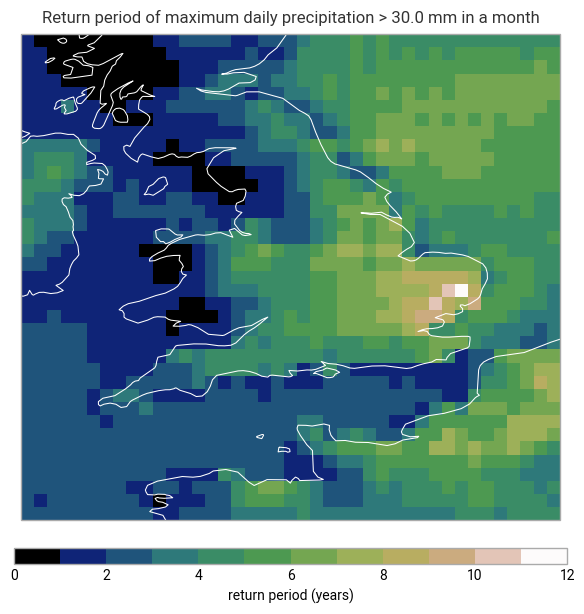

In [5]:
fig = ekp.Figure()
fig.title(f"Return period of maximum daily precipitation > {threshold} mm in a month")

coords = rx1day.to_latlon()

subplot = fig.add_map()
subplot.block(x=coords["lon"], y=coords["lat"], z=return_period, colors="gist_earth")
subplot.legend(label="return period (years)")
subplot.coastlines(color="white")